# numpy intro

## Key Examples

- All of the following problems are found in the text book. 
- Try to answer the questions by searching for appropriate `numpy` functions. 
- Use jupyter notebook

## 1. What is the average height of US presidents?
  - plot a graph of the heights for visual display through time
  - plot a histogram of the heights to examine the distribution of heights
  - Write a python script to find
    1. the tallest president
    2. the shorted president
    3. the average of the heights
    4. the median of the heghts

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
names = np.array(data['name'])

In [4]:
names

array(['George Washington', 'John Adams', 'Thomas Jefferson',
       'James Madison', 'James Monroe', 'John Quincy Adams',
       'Andrew Jackson', 'Martin Van Buren', 'William Henry Harrison',
       'John Tyler', 'James K. Polk', 'Zachary Taylor',
       'Millard Fillmore', 'Franklin Pierce', 'James Buchanan',
       'Abraham Lincoln', 'Andrew Johnson', 'Ulysses S. Grant',
       'Rutherford B. Hayes', 'James A. Garfield', 'Chester A. Arthur',
       'Benjamin Harrison', 'William McKinley', 'Theodore Roosevelt',
       'William Howard Taft', 'Woodrow Wilson', 'Warren G. Harding',
       'Calvin Coolidge', 'Herbert Hoover', 'Franklin D. Roosevelt',
       'Harry S. Truman', 'Dwight D. Eisenhower', 'John F. Kennedy',
       'Lyndon B. Johnson', 'Richard Nixon', 'Gerald Ford',
       'Jimmy Carter', 'Ronald Reagan', 'George H. W. Bush',
       'Bill Clinton', 'George W. Bush', 'Barack Obama'], dtype=object)

In [5]:
data['name'][2]

'Thomas Jefferson'

Text(0.5, 1.0, 'Heights of Presidents through Time')

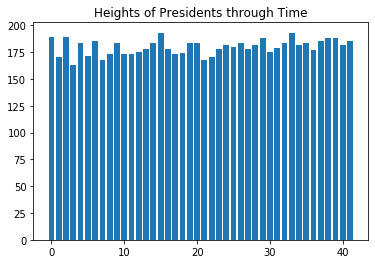

In [6]:
a = np.array (data['height(cm)'])

plt.bar(range(a.size), a)
plt.title('Heights of Presidents through Time')

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

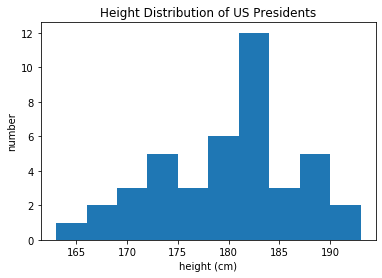

In [8]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

In [9]:
print("Maximum height:    ", heights.max())

Maximum height:     193


In [10]:
imax = heights.argmax()

In [11]:
print('The president of the tallest: ', data['name'][imax] )

The president of the tallest:  Abraham Lincoln


In [12]:
print("Minimum height:    ", heights.min())

Minimum height:     163


In [13]:
imin = heights.argmin()

In [14]:
print ('The president of the shortest: ', data['name'][imin])

The president of the shortest:  James Madison


In [15]:
print("Average height:    ", heights.std())

Average height:     6.931843442745892


In [16]:
print("Mean height:       ", heights.mean())

Mean height:        179.73809523809524


## Count the number of alphabests used in the presidents' names 

In [17]:
count = np.zeros(26, dtype=np.int)
type(count), count.shape, count.dtype, count

(numpy.ndarray,
 (26,),
 dtype('int64'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]))

- Only capital letters will be used.
- The ASCII code of 'A' is 65. Try `print(ord('A'))`
- Therefore, the index to the array `count` is calculated by `ord(upper(c)) - 65`

In [18]:
for name in data['name']:
    for c in name:
        if c == ' ': continue
        upper = c.upper()
        ind = ord(upper) - 65
        count[ind] += 1

In [19]:
count

array([57, 12, 14, 22, 49, 10, 15, 44, 32, 15,  8, 31, 23, 51, 47,  2,  1,
       55, 29, 19,  9,  5, 15,  1, 12,  1])

<BarContainer object of 26 artists>

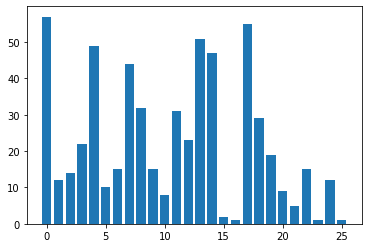

In [20]:
plt.bar(range(count.shape[0]), count)

## Compute score of each president according to the values in `count`

#### the array size must be the same as the size of presidents

In [21]:
score2 = np.zeros(names.shape[0], dtype=np.int)
score2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Another array to compute normalized `score3 = score2 / len(name)`

In [22]:
score3 = np.zeros(names.shape[0])

In [23]:
for i, name in zip(range(names.shape[0]), names):
   # print (i,name)
    score = 0 
    for c in name:
        if c == ' ': continue
        upper = c.upper()
        ind = ord(upper) - 65
        score += count[ind]
    # print (name, score, score/len(name))
    score2[i] = score
    score3[i] = score/len(name)

In [24]:
score2

array([590, 345, 534, 434, 445, 464, 470, 526, 802, 323, 313, 461, 529,
       496, 468, 562, 533, 458, 612, 545, 599, 660, 441, 663, 566, 453,
       617, 447, 530, 692, 510, 633, 453, 554, 461, 363, 354, 547, 471,
       351, 383, 399])

In [25]:
score3

array([34.70588235, 34.5       , 33.375     , 33.38461538, 37.08333333,
       27.29411765, 33.57142857, 32.875     , 36.45454545, 32.3       ,
       24.07692308, 32.92857143, 33.0625    , 33.06666667, 33.42857143,
       37.46666667, 38.07142857, 28.625     , 32.21052632, 32.05882353,
       35.23529412, 38.82352941, 27.5625    , 36.83333333, 29.78947368,
       32.35714286, 36.29411765, 29.8       , 37.85714286, 32.95238095,
       34.        , 31.65      , 30.2       , 32.58823529, 35.46153846,
       33.        , 29.5       , 42.07692308, 27.70588235, 29.25      ,
       27.35714286, 33.25      ])

<BarContainer object of 42 artists>

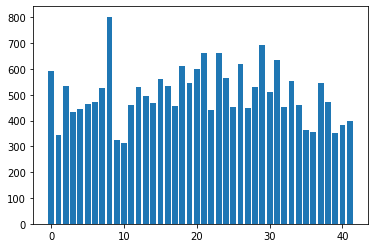

In [26]:
plt.bar(range(score2.shape[0]), score2)

<BarContainer object of 42 artists>

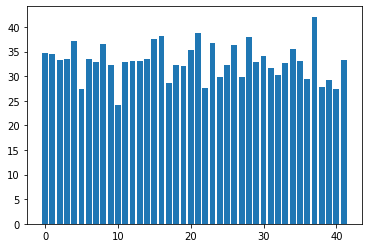

In [27]:
plt.bar(range(score3.shape[0]), score3)

In [28]:
imax3 = score3.argmax()

In [29]:
print ('The president of the highest normalized score is ', names[imax3])

The president of the highest normalized score is  Ronald Reagan


# Compute the score of my name
1. using the routines above, make a function that returns the score: `def get_score3 (name)`
2. test the function with `'Ronald Reagan'` and see if the score is the same as `score3[imax3]`
    - try other names too for sure to check the correctness of your function
3. try your name

In [30]:
def get_score3 (name):
    score = 0
    # your code here
    # -----
    
    # -----
    return score
#